In [ ]:
!nvidia-smi

Sat May  3 13:10:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

#Install yolo v8

In [2]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output
!yolo mode=checks

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 914, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.11/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are frozenset({'val', 'track', 'predict', 'export', 'benchmark', 'train'}).

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS


#connect data for training (frame 3)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("lameess").project("referee-signals-frame-3")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to referee-signals-frame-3-1 in yolov8:: 100%|██████████| 3174/3174 [00:00<00:00, 4304.55it/s]


#train yolov8

In [6]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/referee-signals-frame-3-1/data.yaml epochs=30 imgsz=640 patience=5 batch=8 split=train

100% 49.7M/49.7M [00:00<00:00, 345MB/s]
Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/referee-signals-frame-3-1/data.yaml, epochs=30, time=None, patience=5, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=train, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_

#save folders

In [21]:
import shutil
from google.colab import files

# Replace 'folder_name' with your actual folder name
shutil.make_archive('predicting using the frame 3 model on test set', 'zip', '/content/runs/detect/predict')
files.download('predicting using the frame 3 model on test set.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#train mAP

In [4]:
!yolo detect val model=/content/best.pt data=/content/referee-signals-frame-3-1/data.yaml split=train

Ultralytics 8.3.125 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs
100% 755k/755k [00:00<00:00, 23.4MB/s]
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2589.9±958.4 MB/s, size: 126.3 KB)
val: Scanning /content/referee-signals-frame-3-1/train/labels... 1374 images, 0 backgrounds, 0 corrupt: 100% 1374/1374 [00:00<00:00, 2322.68it/s]
val: New cache created: /content/referee-signals-frame-3-1/train/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 86/86 [00:23<00:00,  3.72it/s]
                   all       1374       1407      0.872      0.901      0.948      0.751
                  Foul        270        276      0.853      0.783      0.906      0.688
       Free_Throw_Made         90         90      0.973      0.816      0.964      0.745
Free_Throw_With_Rebound        285        285      0.961      0.989      0.993      0.801
Free

#iou train

In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ultralytics.utils.metrics import box_iou
import torch

def calculate_iou_ultralytics(pred_boxes, gt_boxes):
    pred_boxes = torch.tensor(pred_boxes, dtype=torch.float32)
    gt_boxes = torch.tensor(gt_boxes, dtype=torch.float32)

    # Calculate IoU matrix
    iou_matrix = box_iou(pred_boxes, gt_boxes)
    return iou_matrix

def evaluate_single_image_iou(model, image_path, gt_boxes, conf_thres, show=True):
    """
    Calculate IoU for a single image with ground truth boxes

    Args:
        model: YOLO model
        image_path: Path to image
        gt_boxes: List of ground truth boxes in xyxy format [x1, y1, x2, y2, class_id]
        conf_thres: Confidence threshold for detections
        show: Whether to show the visualization

    Returns:
        ious: List of IoU values for matched predictions
        pred_boxes: List of predicted boxes
    """
    # Run prediction
    results = model(image_path, conf=conf_thres)

    # Extract prediction boxes
    pred_boxes_xyxy = []
    pred_boxes_data = []

    for r in results:
      boxes = r.boxes
      for box in boxes.data:
          b = box[:4].cpu().numpy()
          conf = float(box[4])
          cls = int(box[5])

          pred_boxes_xyxy.append(b)
          pred_boxes_data.append({
              'box': b,
              'conf': conf,
              'cls': cls
          })


    # Extract ground truth boxes (only coordinates)
    gt_boxes_xyxy = [box[:4] for box in gt_boxes]
    gt_classes = [int(box[4]) for box in gt_boxes]

    # Calculate IoU matrix
    if pred_boxes_xyxy and gt_boxes_xyxy:
        iou_matrix = calculate_iou_ultralytics(
            np.array(pred_boxes_xyxy),
            np.array(gt_boxes_xyxy)
        ).cpu().numpy()
    else:
        iou_matrix = np.array([])

    # Match predictions to ground truth and get IoUs
    matches = []
    if len(iou_matrix) > 0:
        for gt_idx, gt_class in enumerate(gt_classes):
            best_iou = 0.0
            best_pred_idx = -1

            for pred_idx, pred_data in enumerate(pred_boxes_data):
                # Check if classes match
                if int(pred_data['cls']) == gt_class:
                    iou = iou_matrix[pred_idx, gt_idx]
                    if iou > best_iou:
                        best_iou = iou
                        best_pred_idx = pred_idx

            if best_pred_idx >= 0:
                matches.append({
                    'gt_idx': gt_idx,
                    'pred_idx': best_pred_idx,
                    'iou': best_iou,
                    'gt_class': gt_class,
                    'pred_class': int(pred_boxes_data[best_pred_idx]['cls']),
                    'confidence': pred_boxes_data[best_pred_idx]['conf']
                })

    # Visualize
    if show and len(results) > 0:
        fig, ax = plt.subplots(1, figsize=(10, 10))

        # Show image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)

        # Draw ground truth boxes in green
        for box in gt_boxes:
            x1, y1, x2, y2 = box[:4]
            width = x2 - x1
            height = y2 - y1
            rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1-5, f"GT: {int(box[4])}", color='g')

        # Draw predicted boxes in red
        for box_data in pred_boxes_data:
            box = box_data['box']
            x1, y1, x2, y2 = box
            width = x2 - x1
            height = y2 - y1
            rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y2+15, f"Pred: {int(box_data['cls'])}, {box_data['conf']:.2f}", color='r')

        # Draw matches
        for match in matches:
            gt_box = gt_boxes[match['gt_idx']]
            pred_box = pred_boxes_data[match['pred_idx']]['box']

            # Draw line between centers
            gt_center = [(gt_box[0] + gt_box[2])/2, (gt_box[1] + gt_box[3])/2]
            pred_center = [(pred_box[0] + pred_box[2])/2, (pred_box[1] + pred_box[3])/2]

            ax.plot([gt_center[0], pred_center[0]], [gt_center[1], pred_center[1]], 'b-', linewidth=1)
            ax.text((gt_center[0] + pred_center[0])/2, (gt_center[1] + pred_center[1])/2,
                    f"IoU: {match['iou']:.2f}", color='b', backgroundcolor='w')

        ax.set_title(f"IoU Visualization - Matches: {len(matches)}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    return matches, pred_boxes_data

def parse_roboflow_annotations(dataset_path, split="valid"):
    """
    Returns Dictionary mapping image paths to ground truth boxes
    """
    annotations = {}

    # Get paths
    images_dir = os.path.join(dataset_path, split, "images")
    labels_dir = os.path.join(dataset_path, split, "labels")

    # Get class names from data.yaml
    import yaml
    with open(os.path.join(dataset_path, "data.yaml"), 'r') as f:
        data = yaml.safe_load(f)
        class_names = data.get('names', {})

    # Process each image and label
    for img_file in os.listdir(images_dir):
        if not img_file.lower().endswith(('.jpg', '.jpeg')):
            continue

        img_path = os.path.join(images_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(labels_dir, label_file)

        # Check if label file exists
        if not os.path.exists(label_path):
            annotations[img_path] = []
            continue

        # Read image dimensions
        img = cv2.imread(img_path)
        if img is None:
            continue
        img_height, img_width = img.shape[:2]

        # Parse label file (YOLO format: class_id, x_center, y_center, width, height)
        boxes = []
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    x_center = float(parts[1]) * img_width
                    y_center = float(parts[2]) * img_height
                    width = float(parts[3]) * img_width
                    height = float(parts[4]) * img_height

                    # Convert to xyxy format
                    x1 = x_center - width/2
                    y1 = y_center - height/2
                    x2 = x_center + width/2
                    y2 = y_center + height/2

                    boxes.append([x1, y1, x2, y2, class_id])

        annotations[img_path] = boxes

    return annotations, class_names

def calculate_average_iou(model, annotations, conf_thres=0.25, visualize_count=0):
    all_matches = []
    vis_count = 0

    for img_path, gt_boxes in annotations.items():
        if not gt_boxes:  # Skip images without annotations
            continue

        # Decide whether to visualize this image
        show = vis_count < visualize_count
        if show:
            vis_count += 1

        # Calculate IoU for this image
        matches, _ = evaluate_single_image_iou(model, img_path, gt_boxes, conf_thres, show)
        all_matches.extend(matches)

    # Calculate average IoU
    if all_matches:
        avg_iou = sum(m['iou'] for m in all_matches) / len(all_matches)
    else:
        avg_iou = 0.0

    return avg_iou, all_matches

def main_evaluation(model_path, api_key=None, workspace_id=None, project_id=None, version_id=None,
                   dataset_path=None, conf_thres=0.25, visualize_count=5):
    # Load model
    model = YOLO(model_path)

    #dataset_path = '/content/referee-signals-1'

    if not dataset_path:
        raise ValueError("Either dataset_path or Roboflow credentials must be provided")

    # Parse annotations
    annotations, class_names = parse_roboflow_annotations(dataset_path)
    print(f"Loaded {len(annotations)} images with annotations. Class names: {class_names}")

    # Calculate IoU for all images
    avg_iou, all_matches = calculate_average_iou(model, annotations, conf_thres, visualize_count)

    print(f"Average IoU: {avg_iou:.4f} over {len(all_matches)} matched objects")

    # Class-wise IoU
    class_ious = {}
    for match in all_matches:
        cls = match['gt_class']
        if cls not in class_ious:
            class_ious[cls] = []
        class_ious[cls].append(match['iou'])

    print("\nClass-wise IoU:")
    for cls, ious in class_ious.items():
        cls_name = class_names[cls] if cls < len(class_names) else f"Class {cls}"
        avg_cls_iou = sum(ious) / len(ious)
        print(f"  {cls_name}: {avg_cls_iou:.4f} ({len(ious)} objects)")


    # Run Ultralytics built-in validation as well
    print("\nRunning Ultralytics built-in validation:")
    results = model.val(
        data=os.path.join(dataset_path, "data.yaml"),
        conf=conf_thres,
        iou=0.5,
        imgsz=640,
        plots=True,
        save_json=True
    )
    # Return all results
    return {
        'custom_avg_iou': avg_iou,
        'custom_matches': all_matches,
        'class_ious': class_ious,
        'ultralytics_results': results
    }

Loaded 137 images with annotations. Class names: ['Foul', 'Free_Throw_Made', 'Free_Throw_With_Rebound', 'Free_Throw_Without_Rebound', 'Substitutions', 'Three_Point_Shot', 'Two_Free_Throws', 'Two_Points']

image 1/1 /content/referee-signals-frame-3-1/valid/images/frame127905_jpg.rf.605d13a76315523e2a32cb71522d56bf.jpg: 384x640 1 Substitutions, 56.2ms
Speed: 2.6ms preprocess, 56.2ms inference, 154.5ms postprocess per image at shape (1, 3, 384, 640)


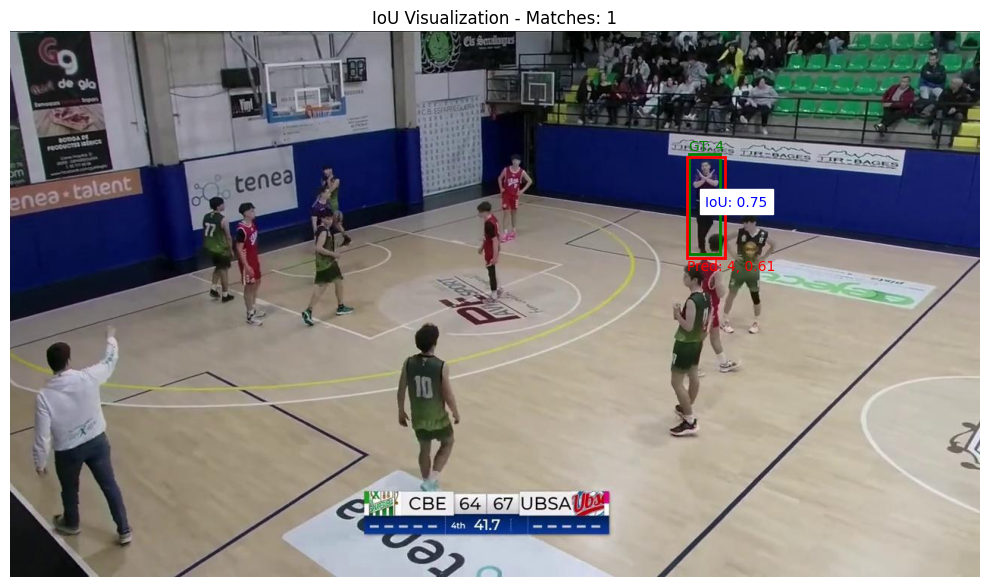


image 1/1 /content/referee-signals-frame-3-1/valid/images/frame88570_jpg.rf.8b7fe9a1a0c23e363f1e993de5fa376e.jpg: 384x640 (no detections), 25.2ms
Speed: 2.9ms preprocess, 25.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


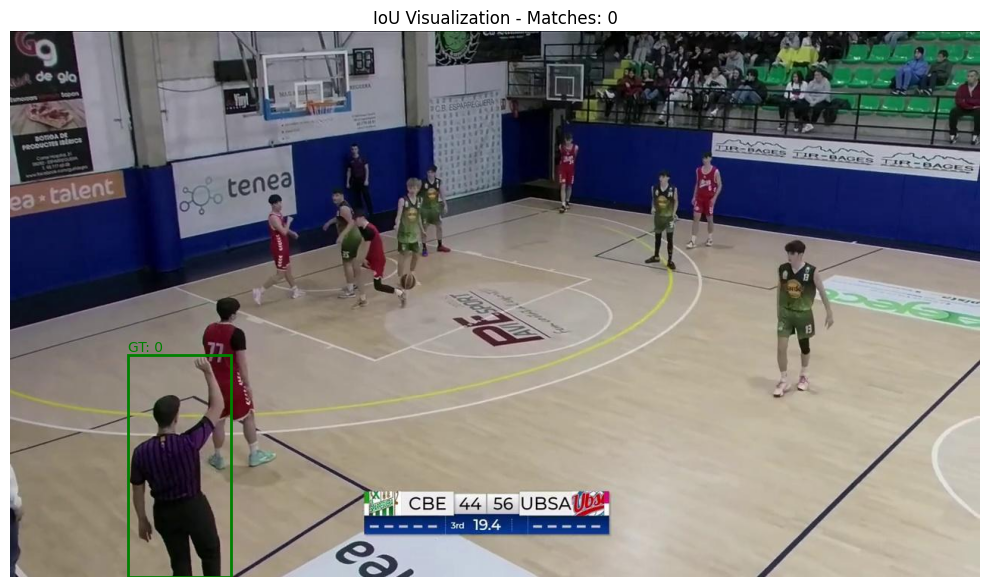


image 1/1 /content/referee-signals-frame-3-1/valid/images/frame50755_jpg.rf.045d598196df728a56c9fa2037bd97ac.jpg: 384x640 1 Free_Throw_Without_Rebound, 25.4ms
Speed: 2.6ms preprocess, 25.4ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


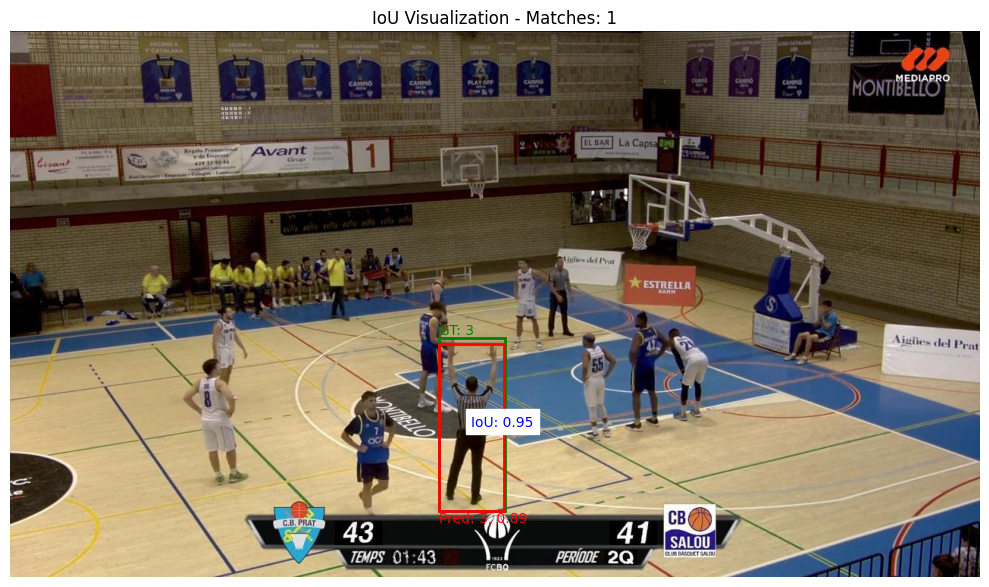


image 1/1 /content/referee-signals-frame-3-1/valid/images/frame99190_jpg.rf.716bb7ec41fde9ff2fb1565f242389f2.jpg: 384x640 1 Free_Throw_Without_Rebound, 25.3ms
Speed: 2.4ms preprocess, 25.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/referee-signals-frame-3-1/valid/images/frame66250_jpg.rf.e5a2b850d7661ba6f757ba2147ced5f9.jpg: 384x640 (no detections), 25.1ms
Speed: 2.0ms preprocess, 25.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/referee-signals-frame-3-1/valid/images/frame125765_jpg.rf.641f34d6ffe61649fd0ebb5c72ccdc09.jpg: 384x640 (no detections), 25.1ms
Speed: 2.0ms preprocess, 25.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/referee-signals-frame-3-1/valid/images/frame81645_jpg.rf.54bc53f40e8ae082dba2e8d45ec07ade.jpg: 384x640 1 Free_Throw_Without_Rebound, 25.2ms
Speed: 2.3ms preprocess, 25.2ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 64

val: Scanning /content/referee-signals-frame-3-1/valid/labels.cache... 137 images, 0 backgrounds, 0 corrupt: 100%|██████████| 137/137 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]


                   all        137        142      0.627      0.552      0.597      0.427
                  Foul         26         27      0.535      0.444      0.512       0.29
       Free_Throw_Made         10         10      0.667        0.4      0.519      0.374
Free_Throw_With_Rebound         25         25      0.917       0.88      0.929      0.664
Free_Throw_Without_Rebound         23         23      0.958          1      0.993      0.776
         Substitutions          8          8          1      0.875      0.937      0.625
      Three_Point_Shot         31         35      0.667      0.514      0.559      0.425
       Two_Free_Throws          4          4          0          0          0          0
            Two_Points         10         10      0.273        0.3      0.329      0.265
Speed: 3.7ms preprocess, 13.1ms inference, 0.0ms loss, 3.4ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val


In [9]:
#run
results = main_evaluation(
    model_path="/content/runs/detect/train/weights/best.pt",
    dataset_path="/content/referee-signals-frame-3-1",
    conf_thres=0.5,
    visualize_count=3
)

#Testing

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("lameess").project("test-data-35u1o")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-data-1 in yolov8:: 100%|██████████| 490/490 [00:00<00:00, 5130.61it/s]


In [16]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/test-data-1/data.yaml split=test save=True

Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1613.4±778.2 MB/s, size: 118.3 KB)
val: Scanning /content/test-data-1/test/labels... 242 images, 0 backgrounds, 0 corrupt: 100% 242/242 [00:00<00:00, 2512.67it/s]
val: New cache created: /content/test-data-1/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:05<00:00,  2.95it/s]
                   all        242        252      0.776      0.708      0.784      0.535
                  Foul         48         50      0.634        0.6      0.571      0.392
       Free_Throw_Made         11         11      0.853      0.818      0.855      0.513
Free_Throw_With_Rebound         34         34      0.953      0.941      0.979      0.742
Free_Throw_Without_Rebound         44         44      0.915      0.977      

#iou testing

In [ ]:
from ultralytics import YOLO
from roboflow import Roboflow
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ultralytics.utils.metrics import box_iou
import torch

def Tcalculate_iou_ultralytics(pred_boxes, gt_boxes):
    pred_boxes = torch.tensor(pred_boxes, dtype=torch.float32)
    gt_boxes = torch.tensor(gt_boxes, dtype=torch.float32)

    # Calculate IoU matrix
    iou_matrix = box_iou(pred_boxes, gt_boxes)
    return iou_matrix

def Tevaluate_single_image_iou(model, image_path, gt_boxes, conf_thres, show=True):
    """
    Calculate IoU for a single image with ground truth boxes

    Args:
        model: YOLO model
        image_path: Path to image
        gt_boxes: List of ground truth boxes in xyxy format [x1, y1, x2, y2, class_id]
        conf_thres: Confidence threshold for detections
        show: Whether to show the visualization

    Returns:
        ious: List of IoU values for matched predictions
        pred_boxes: List of predicted boxes
    """
    # Run prediction
    results = model(image_path, conf=conf_thres)

    # Extract prediction boxes
    pred_boxes_xyxy = []
    pred_boxes_data = []

    for r in results:
      boxes = r.boxes
      for box in boxes.data:
          b = box[:4].cpu().numpy()
          conf = float(box[4])
          cls = int(box[5])

          pred_boxes_xyxy.append(b)
          pred_boxes_data.append({
              'box': b,
              'conf': conf,
              'cls': cls
          })


    # Extract ground truth boxes (only coordinates)
    gt_boxes_xyxy = [box[:4] for box in gt_boxes]
    gt_classes = [int(box[4]) for box in gt_boxes]

    # Calculate IoU matrix
    if pred_boxes_xyxy and gt_boxes_xyxy:
        iou_matrix = calculate_iou_ultralytics(
            np.array(pred_boxes_xyxy),
            np.array(gt_boxes_xyxy)
        ).cpu().numpy()
    else:
        iou_matrix = np.array([])

    # Match predictions to ground truth and get IoUs
    matches = []
    if len(iou_matrix) > 0:
        for gt_idx, gt_class in enumerate(gt_classes):
            best_iou = 0.0
            best_pred_idx = -1

            for pred_idx, pred_data in enumerate(pred_boxes_data):
                # Check if classes match
                if int(pred_data['cls']) == gt_class:
                    iou = iou_matrix[pred_idx, gt_idx]
                    if iou > best_iou:
                        best_iou = iou
                        best_pred_idx = pred_idx

            if best_pred_idx >= 0:
                matches.append({
                    'gt_idx': gt_idx,
                    'pred_idx': best_pred_idx,
                    'iou': best_iou,
                    'gt_class': gt_class,
                    'pred_class': int(pred_boxes_data[best_pred_idx]['cls']),
                    'confidence': pred_boxes_data[best_pred_idx]['conf']
                })

    # Visualize
    if show and len(results) > 0:
        fig, ax = plt.subplots(1, figsize=(10, 10))

        # Show image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)

        # Draw ground truth boxes in green
        for box in gt_boxes:
            x1, y1, x2, y2 = box[:4]
            width = x2 - x1
            height = y2 - y1
            rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y1-5, f"GT: {int(box[4])}", color='g')

        # Draw predicted boxes in red
        for box_data in pred_boxes_data:
            box = box_data['box']
            x1, y1, x2, y2 = box
            width = x2 - x1
            height = y2 - y1
            rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)
            ax.text(x1, y2+15, f"Pred: {int(box_data['cls'])}, {box_data['conf']:.2f}", color='r')

        # Draw matches
        for match in matches:
            gt_box = gt_boxes[match['gt_idx']]
            pred_box = pred_boxes_data[match['pred_idx']]['box']

            # Draw line between centers
            gt_center = [(gt_box[0] + gt_box[2])/2, (gt_box[1] + gt_box[3])/2]
            pred_center = [(pred_box[0] + pred_box[2])/2, (pred_box[1] + pred_box[3])/2]

            ax.plot([gt_center[0], pred_center[0]], [gt_center[1], pred_center[1]], 'b-', linewidth=1)
            ax.text((gt_center[0] + pred_center[0])/2, (gt_center[1] + pred_center[1])/2,
                    f"IoU: {match['iou']:.2f}", color='b', backgroundcolor='w')

        ax.set_title(f"IoU Visualization - Matches: {len(matches)}")
        plt.axis('off')
        plt.tight_layout()
        plt.show()

    return matches, pred_boxes_data

def Tparse_roboflow_annotations(dataset_path, split="test"):
    annotations = {}

    # Get paths
    images_dir = os.path.join(dataset_path, split, "images")
    labels_dir = os.path.join(dataset_path, split, "labels")

    # Get class names from data.yaml
    import yaml
    with open(os.path.join(dataset_path, "data.yaml"), 'r') as f:
        data = yaml.safe_load(f)
        class_names = data.get('names', {})

    # Process each image and label
    for img_file in os.listdir(images_dir):
        if not img_file.lower().endswith(('.jpg', '.jpeg')):
            continue

        img_path = os.path.join(images_dir, img_file)
        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(labels_dir, label_file)

        # Check if label file exists
        if not os.path.exists(label_path):
            annotations[img_path] = []
            continue

        # Read image dimensions
        img = cv2.imread(img_path)
        if img is None:
            continue
        img_height, img_width = img.shape[:2]

        # Parse label file (YOLO format: class_id, x_center, y_center, width, height)
        boxes = []
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) >= 5:
                    class_id = int(parts[0])
                    x_center = float(parts[1]) * img_width
                    y_center = float(parts[2]) * img_height
                    width = float(parts[3]) * img_width
                    height = float(parts[4]) * img_height

                    # Convert to xyxy format
                    x1 = x_center - width/2
                    y1 = y_center - height/2
                    x2 = x_center + width/2
                    y2 = y_center + height/2

                    boxes.append([x1, y1, x2, y2, class_id])

        annotations[img_path] = boxes

    return annotations, class_names

def Tcalculate_average_iou(model, annotations, conf_thres=0.25, visualize_count=0):
    all_matches = []
    vis_count = 0

    for img_path, gt_boxes in annotations.items():
        if not gt_boxes:  # Skip images without annotations
            continue

        # Decide whether to visualize this image
        show = vis_count < visualize_count
        if show:
            vis_count += 1

        # Calculate IoU for this image
        matches, _ = Tevaluate_single_image_iou(model, img_path, gt_boxes, conf_thres, show)
        all_matches.extend(matches)

    # Calculate average IoU
    if all_matches:
        avg_iou = sum(m['iou'] for m in all_matches) / len(all_matches)
    else:
        avg_iou = 0.0

    return avg_iou, all_matches

def Tmain_evaluation(model_path, api_key=None, workspace_id=None, project_id=None, version_id=None,
                   dataset_path=None, conf_thres=0.25, visualize_count=5):
    # Load model
    model = YOLO(model_path)

    #dataset_path = '/content/referee-signals-1'

    if not dataset_path:
        raise ValueError("Either dataset_path or Roboflow credentials must be provided")

    # Parse annotations
    annotations, class_names = Tparse_roboflow_annotations(dataset_path)
    print(f"Loaded {len(annotations)} images with annotations. Class names: {class_names}")

    # Calculate IoU for all images
    avg_iou, all_matches = Tcalculate_average_iou(model, annotations, conf_thres, visualize_count)

    print(f"Average IoU: {avg_iou:.4f} over {len(all_matches)} matched objects")

    # Class-wise IoU
    class_ious = {}
    for match in all_matches:
        cls = match['gt_class']
        if cls not in class_ious:
            class_ious[cls] = []
        class_ious[cls].append(match['iou'])

    print("\nClass-wise IoU:")
    for cls, ious in class_ious.items():
        cls_name = class_names[cls] if cls < len(class_names) else f"Class {cls}"
        avg_cls_iou = sum(ious) / len(ious)
        print(f"  {cls_name}: {avg_cls_iou:.4f} ({len(ious)} objects)")

    # Return all results
    return {
        'custom_avg_iou': avg_iou,
        'custom_matches': all_matches,
        'class_ious': class_ious,
        'ultralytics_results': results
    }

Loaded 242 images with annotations. Class names: ['Foul', 'Free_Throw_Made', 'Free_Throw_With_Rebound', 'Free_Throw_Without_Rebound', 'Substitutions', 'Three_Point_Shot', 'Two_Free_Throws', 'Two_Points']

image 1/1 /content/test-data-1/test/images/frame108005_jpg.rf.72b5a149f001ee3a185af02d701452d1.jpg: 384x640 (no detections), 26.0ms
Speed: 2.3ms preprocess, 26.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


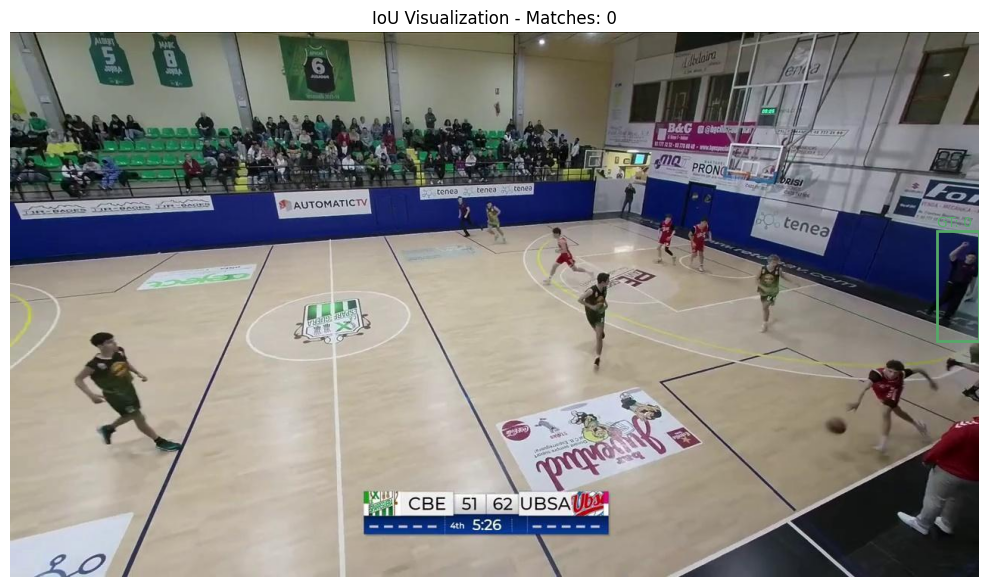


image 1/1 /content/test-data-1/test/images/frame126590_jpg.rf.1fbddc2500cbcd0eb760a62ac2d281b9.jpg: 384x640 1 Free_Throw_Without_Rebound, 27.8ms
Speed: 2.8ms preprocess, 27.8ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


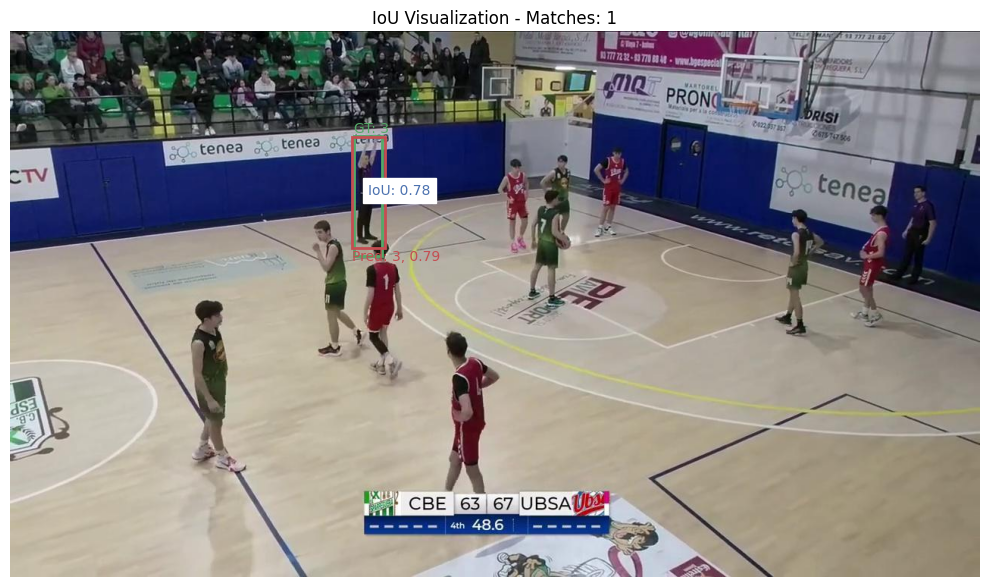


image 1/1 /content/test-data-1/test/images/frame92300_jpg.rf.65c42d839b170dd5330e8674cdfbc0cb.jpg: 384x640 1 Foul, 25.2ms
Speed: 3.2ms preprocess, 25.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


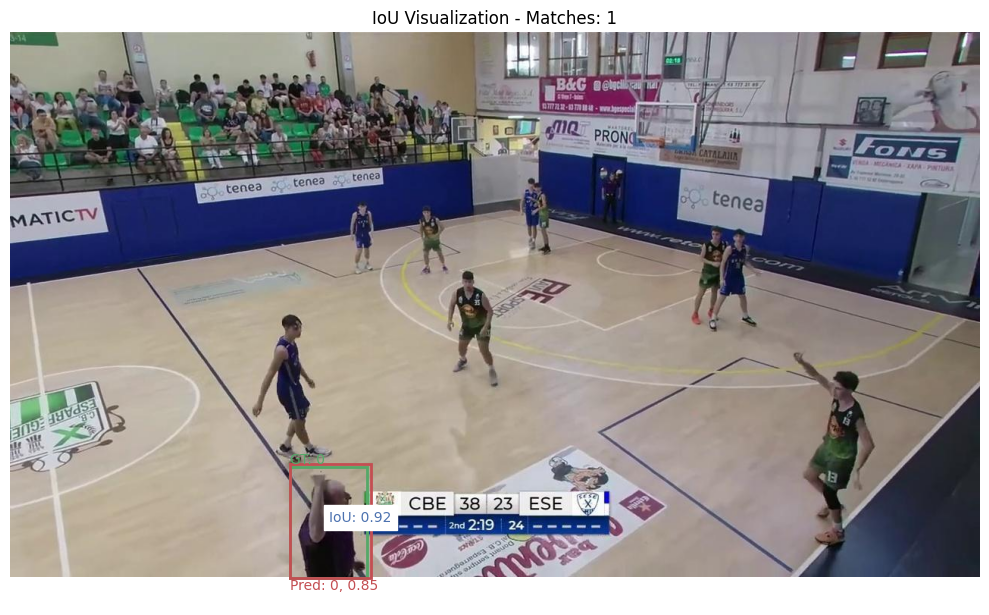


image 1/1 /content/test-data-1/test/images/frame84015_jpg.rf.87799e365557d294191d27624101da5d.jpg: 384x640 1 Two_Points, 25.3ms
Speed: 2.5ms preprocess, 25.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/test-data-1/test/images/frame38970_jpg.rf.1951fcae0444d6be2d285c27b8aaa62d.jpg: 384x640 1 Free_Throw_With_Rebound, 25.2ms
Speed: 2.2ms preprocess, 25.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/test-data-1/test/images/frame86255_jpg.rf.f1b7d6bc4834e8e14e8fe755dc22ae88.jpg: 384x640 1 Two_Points, 25.2ms
Speed: 2.1ms preprocess, 25.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/test-data-1/test/images/frame94480_jpg.rf.87c3d55529fd21b98d80962121596ac0.jpg: 384x640 1 Free_Throw_Made, 25.2ms
Speed: 2.2ms preprocess, 25.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/test-data-1/test/images/frame96300_jpg.rf.5a64234d12cc1648

In [19]:
#run
results = Tmain_evaluation(
    model_path="/content/runs/detect/train/weights/best.pt",
    dataset_path="/content/test-data-1",
    conf_thres=0.5,
    visualize_count=3
)

#Make the model predict on test set images

In [20]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/test-data-1/test/images

Ultralytics 8.3.124 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs

image 1/242 /content/test-data-1/test/images/frame101800_jpg.rf.a33ff79105ed58ac8f4de4ba8af75d9c.jpg: 384x640 1 Two_Free_Throws, 54.9ms
image 2/242 /content/test-data-1/test/images/frame101990_jpg.rf.1ad4db5838356f898f0fa323431b6cfc.jpg: 384x640 1 Free_Throw_Without_Rebound, 25.1ms
image 3/242 /content/test-data-1/test/images/frame102240_jpg.rf.2d0a69c4a02c8055419c1a4392a33c5c.jpg: 384x640 1 Three_Point_Shot, 25.1ms
image 4/242 /content/test-data-1/test/images/frame102245_jpg.rf.4d0f61f6d419294a2e719c075078825f.jpg: 384x640 1 Free_Throw_Without_Rebound, 25.1ms
image 5/242 /content/test-data-1/test/images/frame102435_jpg.rf.ca0459bbd2328e6f3f2990ffb4a5303f.jpg: 384x640 1 Three_Point_Shot, 1 Two_Points, 25.1ms
image 6/242 /content/test-data-1/test/images/frame102445_jpg.rf.9ef2c1627f7a04758bf92f7999ee6ce8.jpg: 384x640 1 Thre